In [7]:
import matlab.engine
import scipy.io as sio
b.eng = matlab.engine.start_matlab()
b.eng.cd(r'D:\Users\Mickael-manip\Desktop\JonMush', nargout=0)

In [15]:
b.eng.open_all(nargout=0)

In [16]:
b.eng.close_all(nargout=0)

In [1]:
#!/usr/bin/python

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# import os
# import sys
import numpy as np

import time

from reservoir import Reservoir
import data

%load_ext autoreload
%autoreload 1
%aimport data
%aimport reservoir

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
steps_in_total_pred = 10
steps_in_each_pred = 10
enc_depth = 6
n_res = 2500
forget=10
b = Reservoir(n_res=n_res, input_scale=2, train_method='ridge', train_param=5,
              weights_type='complex gaussian', random_projection='optical_setup',
              activation_fun='binary', activation_param=1,encoding_method='naivebinary', 
              encoding_param=1, encoded_spatial_points=2**enc_depth, forget=forget, 
              steps_in_total_pred = steps_in_total_pred, steps_in_each_pred = steps_in_each_pred) 
# if DMD: encoded_spatial_points = 2**enc_depth
# if SLM: encoded_spatial_points = 1

In [3]:
input_data = data.mackey_glass(n_sequence=1, sequence_length=2000)
y = data.roll_and_concat(input_data, roll_num=steps_in_each_pred)
input_data = input_data[:,:-10*steps_in_each_pred,:]
y = y[:,:-10*steps_in_each_pred,:]
b.fit(input_data, y)

Start of training...
Initialization finished. Elapsed time:
0.0012500286102294922
Constructing the reservoir
100%|██████████████████████████████████████| 1900/1900 [00:53<00:00, 35.83it/s]
Iterations finished. Elapsed time:
68.28600001335144
Training finished. Elapsed time:
68.60025000572205
Training score:
0.8384493089888436


Reservoir(activation_fun='binary', activation_param=1,
     encoded_spatial_points=64, encoding_method='naivebinary',
     encoding_param=1, forget=10, input_scale=2, n_res=2500,
     opu_transform=None, random_projection='optical_setup',
     random_state=<mtrand.RandomState object at 0x0000000005357C18>,
     res_scale=1, save=0, steps_in_each_pred=10, steps_in_total_pred=10,
     train_method='ridge', train_param=5, verbose=1,
     weights_type='complex gaussian')

In [10]:
input_data = data.mackey_glass(sequence_length=2000)
y = data.roll_and_concat(input_data, roll_num=steps_in_total_pred)
y = y.reshape(-1, y.shape[-1])[forget:]
pred_output, valid_score = b.score(input_data, y)

Start of testing...
Initialization finished. Elapsed time:
0.0025000572204589844
Constructing the reservoir
100%|██████████████████████████████████████| 2000/2000 [00:56<00:00, 35.58it/s]
Iterations finished. Elapsed time:
70.98425006866455
Testing finished. Elapsed time:
71.02649998664856
Testing finished. Elapsed time:
68.60025000572205
Testing score:
0.42309284253667556


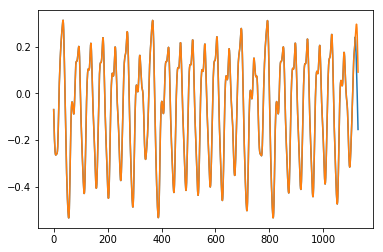

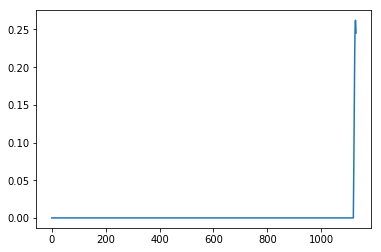

In [12]:
# n_input = round(pred_output.shape[0]/2)-100
n_input = 1120
all_data = np.concatenate((y[:n_input, 0], pred_output[n_input, :]))
plt.figure(1)
plt.plot(all_data)
plt.plot(y[0:n_input+steps_in_total_pred, 0])
plt.show()
plt.figure(2)
plt.plot(y[0:n_input+steps_in_total_pred, 0]-all_data)
# plt.plot(np.linspace(n_input,n_input,100),np.linspace(-0.6,0.6,100))
plt.show()

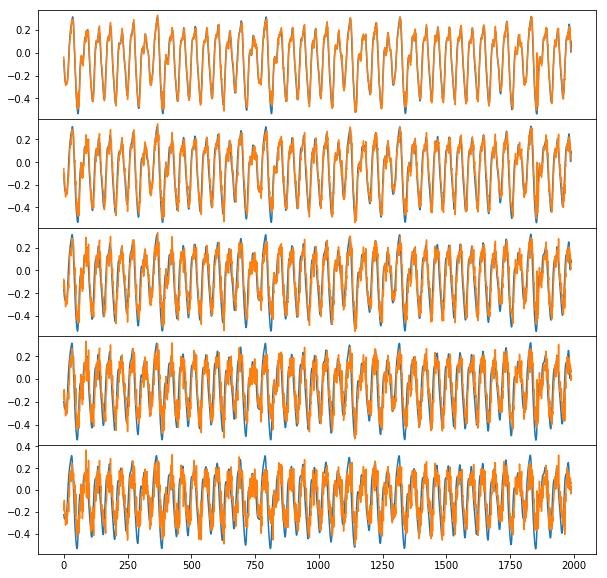

In [13]:
# maximum first 5 prediction steps are illustrated 
pred_step = min(5, y.shape[-1])
fig, axs = plt.subplots(pred_step, 1, sharex=True, figsize=(10,10))
fig.subplots_adjust(hspace=0)
for i in range(pred_step):
    axs[i].plot(y[:,i])
    axs[i].plot(pred_output[:,i])
plt.show()

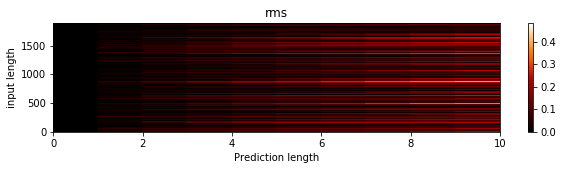

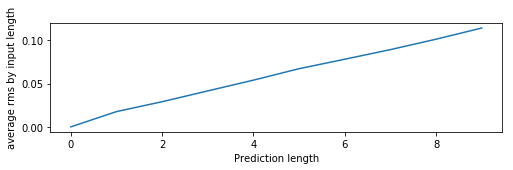

In [8]:
# rms for binary encoding

length_input = pred_output.shape[0]-total_pred_steps
rms = np.zeros((length_input, total_pred_steps))
for n_input in range(1, length_input):
    for n_pred in range(1, total_pred_steps):
        d1 = pred_output[n_input, :n_pred]
        d2 = y[n_input:n_input+n_pred, 0]
        rms[n_input, n_pred] = np.sqrt(1./(n_pred)*np.sum((d1 - d2)**2))

plt.figure(1,figsize=(10,2))
plt.title('rms')
plt.ylabel('input length')
plt.xlabel('Prediction length')
im=plt.pcolormesh(rms[:,:], cmap='gist_heat')
plt.colorbar(im)
plt.show;

plt.figure(2,figsize=(8.1,2))
plt.ylabel('average rms by input length')
plt.xlabel('Prediction length')
plt.plot(np.sum(rms[:,:], axis=0)/length_input)
plt.show;

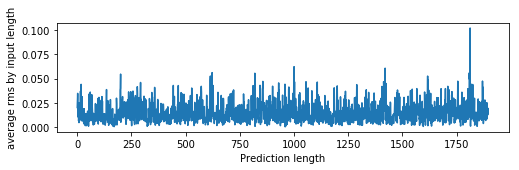

In [25]:
plt.figure(2,figsize=(8.1,2))
plt.ylabel('average rms by input length')
plt.xlabel('Prediction length')
plt.plot(np.sum(rms[1:,:], axis=1)/total_pred_steps)
plt.show;